# BFS Algorithm: Notes & Visualization

This notebook covers the Breadth-First Search (BFS) algorithm, including:
- Motivation and use cases
- Pseudocode
- C++ implementation
- Python visualization on a sample graph

## 1. Why BFS?
- **Goal**: Visit all nodes in “layers” from a start (source) node.
- **Use cases**:
  - Shortest path in unweighted graphs
  - Level-order exploration (e.g., social networks, minimum moves)


## 2. Core Concepts
- **Source node**: the fixed starting point.
- **Queue (FIFO)**: ensures we finish one “distance layer” before the next.
- **Visited tracking**: prevents infinite loops in cycles.


## 3. BFS Pseudocode
```text
BFS(Graph, source):
  let Q ← empty queue
  let visited[ ] ← array of size |V|, initialized to false

  visited[source] ← true
  enqueue(Q, source)

  while Q is not empty:
    u ← dequeue(Q)
    PROCESS(u)                  # e.g., print u

    for each v in neighbors(u):
      if not visited[v]:
        visited[v] ← true
        enqueue(Q, v)
```

## 4. BFS in C++
```cpp
#include <iostream>
#include <vector>
#include <queue>
using namespace std;

using AdjList = vector<vector<int>>;

void BFS(const AdjList &graph, int source) {
    int n = graph.size();
    vector<bool> visited(n, false);
    queue<int> q;

    visited[source] = true;
    q.push(source);

    while (!q.empty()) {
        int u = q.front();
        q.pop();
        cout << u << " ";
        for (int v : graph[u]) {
            if (!visited[v]) {
                visited[v] = true;
                q.push(v);
            }
        }
    }
}

int main() {
    AdjList graph = {
        {1,2}, {0,3,4}, {0,5,6}, {1}, {1}, {2}, {2}
    };
    cout << "BFS order from node 0: ";
    BFS(graph, 0);
    cout << endl;
    return 0;
}
```

## 5. Python Visualization of BFS
We build a sample undirected graph, run BFS from node 0, and color nodes by layer.

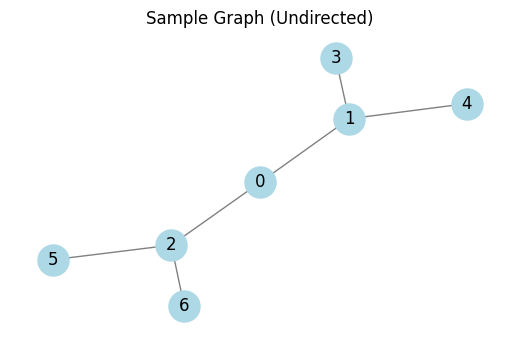

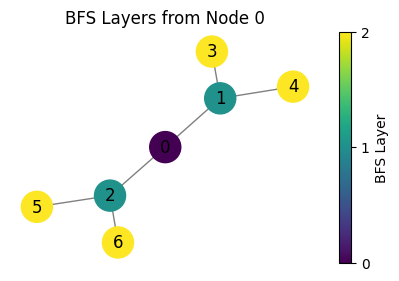

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import deque

# Create sample graph
G = nx.Graph()
edges = [(0,1),(0,2),(1,3),(1,4),(2,5),(2,6)]
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

# Plot original graph
plt.figure(figsize=(5,3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title("Sample Graph (Undirected)")
plt.show()

# BFS to compute layer distances
start = 0
visited = {start}
dist = {start: 0}
queue = deque([start])
while queue:
    u = queue.popleft()
    for v in G.neighbors(u):
        if v not in visited:
            visited.add(v)
            dist[v] = dist[u] + 1
            queue.append(v)

# Color nodes by layer
layers = sorted(set(dist.values()))
colors = [dist[n] for n in G.nodes()]

fig, ax = plt.subplots(figsize=(5,3))
nx.draw(G, pos, ax=ax, with_labels=True,
        node_color=colors, cmap=plt.cm.viridis,
        node_size=500, edge_color='gray')
norm = mpl.colors.Normalize(vmin=min(layers), vmax=max(layers))
sm = mpl.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=layers)
cbar.set_label('BFS Layer')
plt.title("BFS Layers from Node 0")
plt.show()
